# Определение поверхностей

Выделение полигонов на упаковке

In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

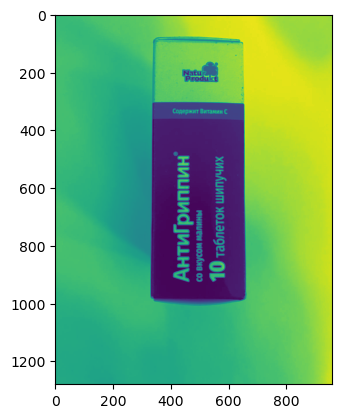

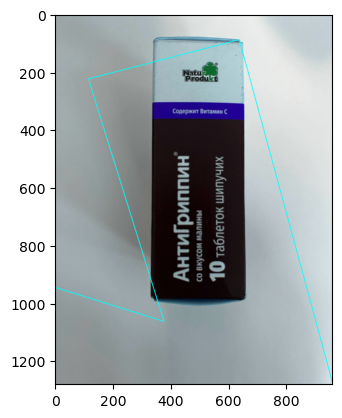

In [35]:
def mark_polygon(path):
    # Загрузка изображения
    image = cv2.imread(path)
    # Преобразование изображения в оттенки серого
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    plt.imshow(grayscale_image)
    plt.show()
    _, binary_image = cv2.threshold(grayscale_image, 160, 200, cv2.THRESH_BINARY)
    # Поиск всех контуров
    all_contours, hierarchy = cv2.findContours(binary_image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    areas = [cv2.contourArea(c) for c in all_contours]
    max_index = np.argmax(areas)
    cnt = all_contours[max_index]
    approx = cv2.approxPolyDP(cnt, 0.04 * cv2.arcLength(cnt, True), True)
    
    return image,approx
image,approx=mark_polygon("images/boxes/antigrip/2.png")
plt.imshow(cv2.drawContours(image, [approx], 0, (0, 255, 255), 2))
plt.show()

}Преобразование полигонов в прямоугольник

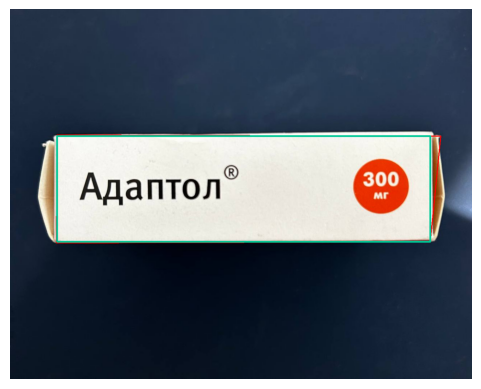

In [16]:
y=[elem for i in (approx[:,:,1]) for elem in i]
x=[elem for i in (approx[:,:,0]) for elem in i]
x.sort()
y.sort()
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_dub=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.rectangle(image_rgb, (x[1], y[1]), (x[2], y[2]), (0, 200, 150), 3)  # RGB цвет для прямоугольника - красный
plt.imshow(image_rgb)
plt.axis('off')  # Убрать оси координат
plt.show()

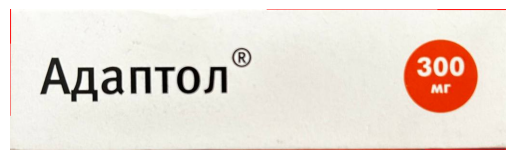

In [17]:
cropped_image = image_dub[y[1]:y[2], x[1]:x[2]]
plt.imshow(cropped_image)
plt.axis('off')  # Убрать оси координат
plt.show()


In [18]:
# Сохраняем вырезанный прямоугольник как изображение
cv2.imwrite('cropped_image.jpg', cv2.cvtColor(cropped_image, cv2.COLOR_RGB2BGR))

print("Вырезанный прямоугольник сохранен как 'cropped_image.jpg'")

Вырезанный прямоугольник сохранен как 'cropped_image.jpg'


In [52]:
import cv2
import numpy as np

# Загрузка изображения
image = cv2.imread('images/boxes/antigrip/photo_4_2024-05-03_15-27-13.jpg', cv2.IMREAD_GRAYSCALE)

# Применение оператора Собеля
sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)

# Вывод изображений
cv2.imshow('Original', image)
cv2.imshow('Sobel X', sobelx)
cv2.imshow('Sobel Y', sobely)

cv2.waitKey(0)
cv2.destroyAllWindows()


In [70]:
def mark_polygon(path):
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

# Применение оператора Собеля
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
    # Преобразование изображения в оттенки серого
    grayscale_image = sobelx+sobely
    # Поиск всех контуров
# Преобразование изображения в 8-битное одноканальное
    binary_image = cv2.convertScaleAbs(sobelx + sobely)

    all_contours, hierarchy = cv2.findContours(binary_image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    # Поиск наибольшего контура по площади
    max_contour = max(all_contours, key=cv2.contourArea)
    # Аппроксимация контура полигоном
    epsilon = 0.04 * cv2.arcLength(max_contour, True)
    approx = cv2.approxPolyDP(max_contour, epsilon, True)
    plt.imshow(grayscale_image)
    plt.show()
    return image,approx
image,approx=mark_polygon("images/boxes/antigrip/2.png")

KeyboardInterrupt: 

In [68]:
y=[elem for i in (approx[:,:,1]) for elem in i]
x=[elem for i in (approx[:,:,0]) for elem in i]
x.sort()
y.sort()
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_dub=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [69]:
cropped_image = image_dub[y[1]:y[2], x[1]:x[2]]
plt.imshow(cropped_image)
plt.axis('off')  # Убрать оси координат
plt.show()

IndexError: list index out of range